## Projekt Neuronales Netzwerk

### Keras und Tensorflow installieren

- Keras ist in Tensorflow Integriert worden.
- Keras ist in Python entwickelt, Tensorflow in C++
- Keras komofrtabele Schnittstelle um auf Tensorflow zuzugreifen
- es reicht aus, Tensorflow zu installieren.
- Tensorflow läuft nur mit Python bis zur Version 3.12.

In [1]:
!pip3 install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import keras

In [3]:
keras.__version__

'3.8.0'

### Unsere Daten

Datenbank: FASHIONMNIST

- 10 Kategorien: 
  - T-Shirt
  - Trousers
  - Dress
  - Coat
  - Sandale
  - Shirt
  - Pullover
  - Sneaker
  - Bag
- jedes Bild ist 28 x 28 Pixel groß
- Bilder in Graustufen

Beispiele:

![](/Users/martin/Workspace/Jupyter_Notebooks/Info_KS/6_Artificial_Intelligence/images/The-FashionMNIST-dataset-consists-of-10-classes-of-monochrome-clothing-items-and-is.png){width=400px}


### Aufbau eines neuronales Netzwerk zur Erkennung eines T-Shirts.

- Entscheidungsfrage: Ist auf dem Bild ein T-Shirt zu sehen oder nicht?
- Aufbau:
  - Eingans-Layer: 28 x 28 Pixel, dh. 28*28=784 Eingänge
  - Hidden Layer: 100 Neuronen
  - Output-Layer: 1 Neuron mit der Ausgabe, ob es sich um ein T-Shirt handelt (1) oder nicht (0)
  

#### 1. Bilder einlesen

In [4]:
import gzip
import numpy as np 

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)



Ein Numpy Array wird erzeugt mit den eingelesenen Werten

In [5]:
#Daten einlesen
x_training = open_images("train-images-idx3-ubyte.gz")

BadGzipFile: Not a gzipped file (b'\x00\x00')

In [26]:
x_training

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
x_training.shape

(10000, 28, 28)

### Exkurs Numpy Array


- Modulimport 
  ```python 
  import numpy as np
  ```
- Numpy-Array
  - effizienter als Python-Listen
  - zusätzliche Operationen
  - Matrixausgabe möglich

In [7]:
a=np.array([1,2,3,4])
print (a)
print(a*2)
print(a+3)
print(a+a)
print(a*a)
matrix = np.array([[1,2,3],[4,5,6]])

print(matrix)
print(matrix[0,1])
print(matrix[:,1])


[1 2 3 4]
[2 4 6 8]
[4 5 6 7]
[2 4 6 8]
[ 1  4  9 16]
[[1 2 3]
 [4 5 6]]
2
[2 5]


In [21]:
!pip3 install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.6 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.7 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<function matplotlib.pyplot.show(close=None, block=None)>

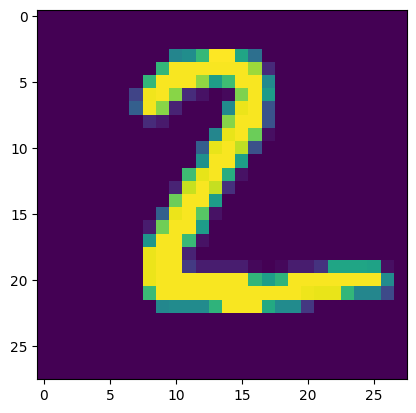

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt.imshow(X_training[0])
plt.imshow(X_training[1])
#plt.imshow(X_training[2], cmap="gray_r")
plt.show

### 2. Modell erstellen

![](/Users/martin/Workspace/Jupyter_Notebooks/Info_KS/6_Artificial_Intelligence/images/NN.png){width=400px}


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model1 = Sequential()
model1.add(Dense(100, activation="sigmoid",input_shape=(784,))) #Hidden Layer wird zugefügt mit allen Gewichten definiert und 100 Neuronen
model1.add(Dense(1,activation="sigmoid"))

model1.compile(optimizer="sgd", loss="binary_crossentropy")
#wichtig für Compilierung eines effizienten Codes



### 3. Modell trainieren




#### 3.1 Form der Daten

In [37]:
x_training[0]

NameError: name 'x_training' is not defined

Daten müssen angepasst in der Form angepasst. Wir brauchen 60000 Datenstränge, die 784 Daten enthält. Dafür benutzen wir die Funktion `reshape`

In [35]:

model1.fit(x_training.reshape(60000, 784),
           y_training,
           epoche = 10,
           batch_size =1000)

NameError: name 'x_training' is not defined

#### 3.2 Form der Label 

In [16]:
#Label einlesen 
y_training = open_labels("train-labels-idx1-ubyte.gz")

In [ ]:
# Label anzeigen
y_training

Schreibe dort True rein, wo im Array 0 steht (=T-Shirt)


In [ ]:
y_training == 0

### 4. Vorhersage

In [ ]:
model1.predict(x_training[1]reshape(1,784))

In [39]:
y_training_predict = model1.predict(x_training.reshape(60000, 784))

NameError: name 'x_training' is not defined

In [ ]:
np.round(y_training_prediction)
